# Analyse des données issues des ventes en ligne de l'entreprise 

In [440]:
# importation des librairies 
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [441]:
# lecture des fichiers csv 
df_vente = pd.read_csv('ventes.csv')
df_client = pd.read_csv('clients.csv')
df_produit = pd.read_csv('produits.csv')

In [442]:
# exploration des données 

In [443]:
df_vente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


In [444]:
df_vente

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [445]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [446]:
df_client

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [447]:
df_produit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [448]:
df_produit

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [449]:
df_produit.price.agg(['min', 'max'])

min     -1.0
max    300.0
Name: price, dtype: float64

## Mission n° 1 : Nettoyage des données 

### Valeurs manquantes : 

In [450]:
df_vente.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [451]:
df_client.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [452]:
df_produit.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

### Conclusion : Il n'y a pas de valeurs manquantes dans ces 3 fichiers.

### Duplicates : 

In [453]:
df_vente.duplicated(subset=None).value_counts()

False    336890
True        126
dtype: int64

In [454]:
df_client.duplicated('client_id').value_counts()

False    8623
dtype: int64

In [455]:
df_produit.duplicated('id_prod').value_counts()

False    3287
dtype: int64

In [456]:
# sorting by first name
df_vente.sort_values("date")
 
# making a bool series
bool_series = df_vente["date"].duplicated()
 
# displaying data
df_vente.head()
 
# display data
df_vente[bool_series]

,id_prod,date,session_id,client_id
27161,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_0
34387,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_0
48425,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
54813,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
56373,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


In [457]:
df_produit.loc[df_produit['id_prod'] == 'T_0']

,id_prod,price,categ
731,T_0,-1.0,0


In [458]:
# Les duplicates de la dataframe df_vente, sont des tests effectués le 2021-03-01, je vais les supprimer 
df_vente.drop(df_vente.index[df_vente['id_prod'] == 'T_0'], inplace = True)

In [459]:
df_vente.duplicated(subset=None).value_counts()

False    336816
dtype: int64

### Outliers

<AxesSubplot:>

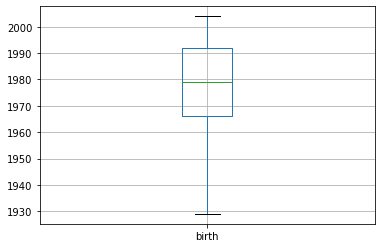

In [460]:
df_client[['birth']].boxplot()

<AxesSubplot:>

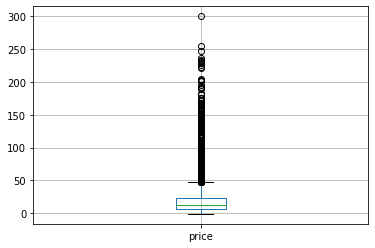

In [461]:
df_produit[['price']].boxplot()

In [462]:
df_produit.drop(df_produit.index[df_produit['price'] < 0], inplace = True)

In [463]:
df_client.sex.value_counts()

f    4491
m    4132
Name: sex, dtype: int64

In [464]:
df_vente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     336816 non-null  object
 1   date        336816 non-null  object
 2   session_id  336816 non-null  object
 3   client_id   336816 non-null  object
dtypes: object(4)
memory usage: 12.8+ MB


In [465]:
df_vente_produit = df_vente.merge(df_produit,how='left')

In [466]:
df_vente_produit

,id_prod,date,session_id,client_id,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0
...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,31.99,1.0
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,22.99,0.0
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,11.03,0.0
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,50.99,2.0


In [467]:
df_all = df_vente_produit.merge(df_client, how='left')
df_all.iloc[6231]

id_prod                           0_2245
date          2021-06-17 03:03:12.668129
session_id                       s_49705
client_id                         c_1533
price                                NaN
categ                                NaN
sex                                    m
birth                               1972
Name: 6231, dtype: object

In [468]:
#df_nan = df_all[df_all.isna().any(axis=1)]
#df_nan

In [469]:
df_without_nan = df_all.dropna()
df_without_nan

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980
...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,31.99,1.0,m,1969
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,22.99,0.0,m,1991
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,11.03,0.0,f,1968
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,50.99,2.0,f,1994


In [470]:
df_nan.id_prod.value_counts()

0_2245    103
Name: id_prod, dtype: int64

In [471]:
df_without_nan[df_all.isna().any(axis=1)]

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4084\3718480314.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_nan[df_all.isna().any(axis=1)]


,id_prod,date,session_id,client_id,price,categ,sex,birth


In [472]:
df_produit.loc[df_produit['id_prod'] == '0_2245']

,id_prod,price,categ


In [473]:
df_all['year'] = pd.DatetimeIndex(df_all.date).year

In [474]:
df_all['simple_date'] = pd.DatetimeIndex(df_all.date).date

In [475]:
df_all['hour'] = pd.DatetimeIndex(df_all.date).time

In [476]:
import locale
locale.setlocale(locale.LC_ALL, 'fr_FR')

df_all['day'] = pd.DatetimeIndex(df_all.date).strftime('%A')
df_all['month'] = pd.DatetimeIndex(df_all.date).strftime('%B')
df_all['hour'] = pd.DatetimeIndex(df_all.date).strftime('%H:%M')

In [482]:
df_all['client_age'] = df_all.year - df_all.birth
df_all

,id_prod,date,session_id,client_id,price,categ,sex,birth,year,simple_date,hour,day,month,client_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,2021,2021-04-10,18:37,samedi,avril,44
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000,2022,2022-02-03,01:55,jeudi,février,22
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979,2021,2021-09-23,15:13,jeudi,septembre,42
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963,2021,2021-10-17,03:27,dimanche,octobre,58
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980,2021,2021-07-17,20:34,samedi,juillet,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,31.99,1.0,m,1969,2021,2021-05-28,12:35,vendredi,mai,52
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,22.99,0.0,m,1991,2021,2021-06-19,00:19,samedi,juin,30
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,11.03,0.0,f,1968,2021,2021-03-16,17:31,mardi,mars,53
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,50.99,2.0,f,1994,2021,2021-10-30,16:50,samedi,octobre,27


min    17
max    93
Name: age, dtype: int64

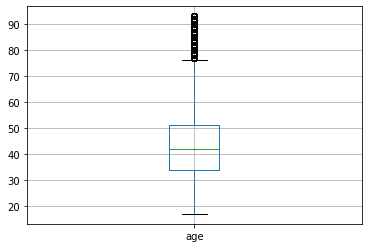

In [305]:
df_all[['age']].boxplot()
df_all.age.agg(['min', 'max'])

## Mission n° 2 : Analyses des données 

    • des indicateurs de tendance centrale et de dispersion ;
    • une analyse de concentration, via une courbe de Lorenz et un indice de Gini ;
    • des représentations graphiques, dont au moins un histogramme, une représentation avec des "boîtes à moustaches", et une représentation de série temporelle (c’est-à-dire un graphique dont l’axe des abscisses représente des dates) ;
    • des analyses bivariées.

### Indicateurs de tendances centrale (mean, median=quartilles 50%) et de dispersion (std, quartilles):

In [478]:
#pd.set_option('display.float_format', lambda x: '%.3f' % x) --> pour définir le nombre de virgule sur tout les output pandas
df_all.describe().applymap('{:.1f}'.format)

,price,categ,birth,year,client_age
count,336713.0,336713.0,336816.0,336816.0,336816.0
mean,17.2,0.4,1977.8,2021.2,43.4
std,17.9,0.6,13.5,0.4,13.5
min,0.6,0.0,1929.0,2021.0,17.0
25%,8.6,0.0,1971.0,2021.0,34.0
50%,13.9,0.0,1980.0,2021.0,42.0
75%,19.0,1.0,1987.0,2021.0,51.0
max,300.0,2.0,2004.0,2022.0,93.0


## Mission n° 3 : Corrélations

    1. Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?
    2. Y a-t-il une corrélation entre l'âge des clients et :

        ◦ Le montant total des achats ;
        ◦ La fréquence d’achat (ie. nombre d'achats par mois par exemple) ;
        ◦ La taille du panier moyen (en nombre d’articles) ;
        ◦ Les catégories de produits achetés.

In [513]:
df_panier = df_all.session_id.value_counts()
df_panier.describe()

count    169194.000000
mean          1.990709
std           1.274256
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          14.000000
Name: session_id, dtype: float64

In [514]:
df_panier_prix = df_all.groupby('session_id').sum()
df_panier_prix

,price,categ,birth,year,client_age
session_id,,,,,
s_1,11.99,0.0,1967,2021,54
s_10,26.99,1.0,1970,2021,51
s_100,33.72,0.0,3956,4042,86
s_1000,39.22,0.0,7956,8084,128
s_10000,41.49,1.0,5967,6063,96
...,...,...,...,...,...
s_99994,28.92,0.0,5949,6063,114
s_99995,19.84,0.0,1960,2021,61
s_99996,56.27,0.0,7896,8084,188


In [515]:
df_panier_prix.describe()

,price,categ,birth,year,client_age
count,169194.000000,169194.000000,169194.000000,169194.000000,169194.000000
mean,34.259949,0.856053,3937.270618,4023.570688,86.300070
std,31.872846,0.980718,2525.290588,2575.499546,58.267115
min,0.000000,0.000000,1929.000000,2021.000000,17.000000
25%,15.200000,0.000000,1971.000000,2021.000000,50.000000
50%,25.560000,1.000000,3918.000000,4042.000000,69.000000
75%,42.980000,1.000000,5898.000000,6063.000000,110.000000
max,539.230000,10.000000,27888.000000,28294.000000,858.000000


In [518]:
df_panier_age = df_all.groupby('session_id').count()
df_panier_age

,id_prod,date,client_id,price,categ,sex,birth,year,simple_date,hour,day,month,client_age
session_id,,,,,,,,,,,,,
s_1,1,1,1,1,1,1,1,1,1,1,1,1,1
s_10,1,1,1,1,1,1,1,1,1,1,1,1,1
s_100,2,2,2,2,2,2,2,2,2,2,2,2,2
s_1000,4,4,4,4,4,4,4,4,4,4,4,4,4
s_10000,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
s_99994,3,3,3,3,3,3,3,3,3,3,3,3,3
s_99995,1,1,1,1,1,1,1,1,1,1,1,1,1
s_99996,4,4,4,4,4,4,4,4,4,4,4,4,4
